# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [60]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm 
import math
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import fiona
from shapely.geometry import Point, Polygon
import seaborn as sns
plt.style.use('seaborn')
sns.set(style="white")

In [65]:
housing = pd.read_csv('kc_house_data_test_features.csv')
hf = pd.read_csv('kc_house_data_train.csv')
zipfile = "Zip_Codes-shp"
street_map = gpd.read_file(zipfile)
crs = {'init': 'epsg:4326'}

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

/Users/astroraf/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 540739.55 and sigma = 373308.18



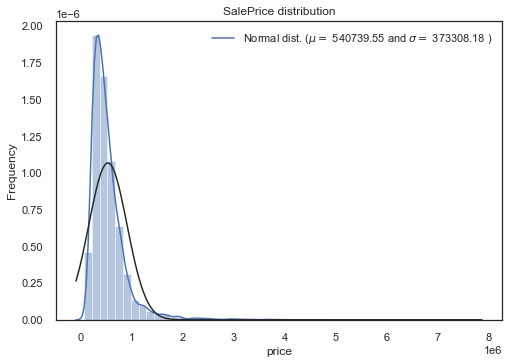

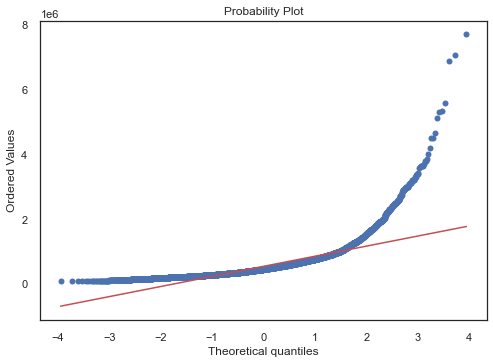

Skewness: 4.282599
Kurtosis: 38.520298


In [336]:
# Plot Histogram
sns.distplot(hf['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(hf['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(hf['price'], plot=plt)
plt.show()

print("Skewness: %f" % hf['price'].skew())
print("Kurtosis: %f" % hf['price'].kurt())

<AxesSubplot:>

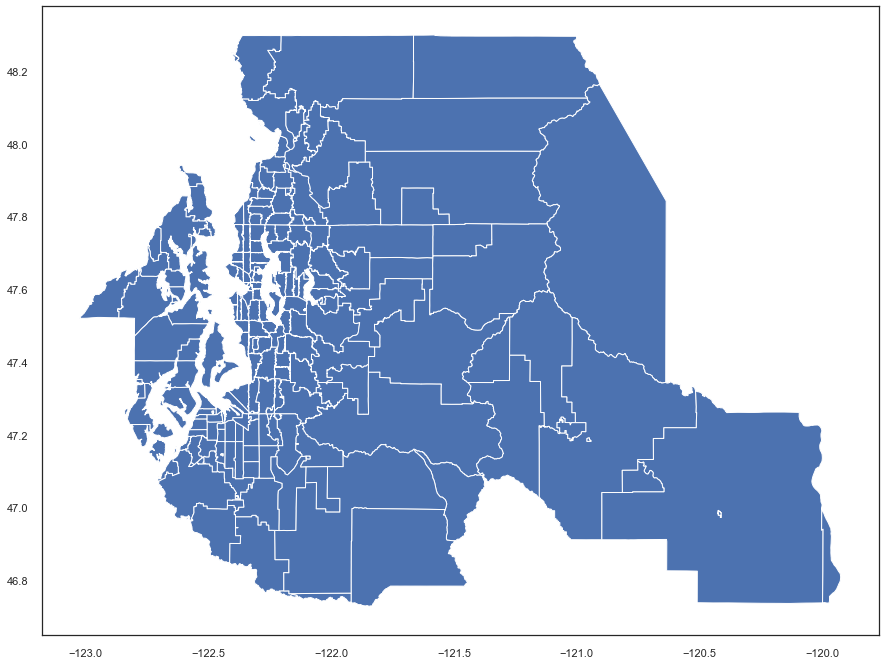

In [58]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax)

In [283]:
hf.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'geometry'],
      dtype='object')

In [239]:
sqliv = hf.loc[hf['sqft_living'] > 6850]
len(sqliv)

30

In [256]:
sqlot = hf.loc[hf['sqft_lot'] > 425000]
len(sqlot)

30

In [262]:
sqlot = hf.loc[hf['floors'] > 2.5]
len(sqlot)

482

In [269]:
view = hf.loc[hf['view'] > 3]
len(view)

270

In [282]:
cond = hf.loc[hf['condition'] >= 5 ]
len(cond)

1367

In [218]:
geometry = [Point(xy) for xy in zip(hf['long'], hf['lat'])]
geometry[:3]

In [298]:
sqabove = hf.loc[hf['sqft_above'] >= 5800]
len(sqabove)

30

In [316]:
sqliv15 = hf.loc[hf['sqft_living15'] >= 4820]
len(sqliv15)

30

In [325]:
sqlot15 = hf.loc[hf['sqft_lot15'] >= 250000]
len(sqlot15)

30

In [307]:
sqbase = hf.loc[hf['sqft_basement'] >= 2180]
len(sqbase)

30

In [216]:
hf[hf['sqft_living'] >= 7]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
220,220,5316101075,20140926T000000,2885000.0,7,3.00,5350,14400,2.5,0,...,5020,330,1910,0,98112,47.6295,-122.285,3050,7469,POINT (-122.28500 47.62950)
732,732,1683400165,20150430T000000,853800.0,7,4.00,2960,2665,2.0,0,...,1950,1010,1927,2013,98144,47.5835,-122.313,1970,4410,POINT (-122.31300 47.58350)
1015,1015,1652500060,20140711T000000,1650000.0,8,2.75,4040,20666,1.0,0,...,2020,2020,1962,0,98004,47.6340,-122.221,3670,20500,POINT (-122.22100 47.63400)
1987,1987,2616800600,20140530T000000,840000.0,7,4.50,4290,37607,1.5,0,...,4290,0,1982,0,98027,47.4812,-122.033,2810,40510,POINT (-122.03300 47.48120)
2134,2134,3812400455,20141104T000000,291000.0,7,1.00,2350,8636,1.0,0,...,1550,800,1962,0,98118,47.5432,-122.277,1500,7366,POINT (-122.27700 47.54320)
2356,2356,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,...,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,POINT (-122.36300 47.55600)
2505,2505,9175600025,20141007T000000,800000.0,7,6.75,7480,41664,2.0,0,...,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190,POINT (-122.36800 47.46430)
2548,2548,5451100490,20150115T000000,884900.0,7,4.75,5370,10800,1.5,0,...,5370,0,1967,0,98040,47.5380,-122.223,2310,10910,POINT (-122.22300 47.53800)
2991,2991,8813400155,20141219T000000,808000.0,8,3.75,3460,4600,2.0,0,...,2860,600,1987,0,98105,47.6617,-122.289,2170,3750,POINT (-122.28900 47.66170)
3275,3275,1225069038,20140505T000000,2280000.0,7,8.00,13540,307752,3.0,0,...,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,POINT (-121.98600 47.66750)


In [215]:
hf[hf['bathrooms'] >= 5.5]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
940,940,622069006,20140820T000000,1500000.0,4,5.50,6550,217374,1.0,0,...,5400,1150,2006,0,98058,47.4302,-122.095,4110,50378,POINT (-122.09500 47.43020)
1327,1327,2424059170,20150219T000000,900000.0,5,6.00,7120,40806,2.0,0,...,5480,1640,2007,0,98006,47.5451,-122.114,3440,36859,POINT (-122.11400 47.54510)
2232,2232,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,...,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,POINT (-122.23300 47.62890)
2505,2505,9175600025,20141007T000000,800000.0,7,6.75,7480,41664,2.0,0,...,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190,POINT (-122.36800 47.46430)
3168,3168,2524069097,20140509T000000,2238890.0,5,6.50,7270,130017,2.0,0,...,6420,850,2010,0,98027,47.5371,-121.982,1800,44890,POINT (-121.98200 47.53710)
3193,3193,2626069030,20150209T000000,1940000.0,4,5.75,7220,223462,2.0,0,...,6220,1000,2000,0,98053,47.7097,-122.013,2680,7593,POINT (-122.01300 47.70970)
3195,3195,6447300265,20141014T000000,4000000.0,4,5.50,7080,16573,2.0,0,...,5760,1320,2008,0,98039,47.6151,-122.224,3140,15996,POINT (-122.22400 47.61510)
3275,3275,1225069038,20140505T000000,2280000.0,7,8.00,13540,307752,3.0,0,...,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,POINT (-121.98600 47.66750)
3425,3425,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,...,4050,0,1996,0,98144,47.5923,-122.301,1448,3866,POINT (-122.30100 47.59230)
3833,3833,8835770170,20140822T000000,1488000.0,5,6.00,6880,279968,2.0,0,...,4070,2810,2007,0,98045,47.4624,-121.779,4690,256803,POINT (-121.77900 47.46240)


In [142]:
geo_df = gpd.GeoDataFrame(hf,
                         crs = crs,
                         geometry = geometry)
geo_df.columns

/Users/astroraf/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'geometry'],
      dtype='object')

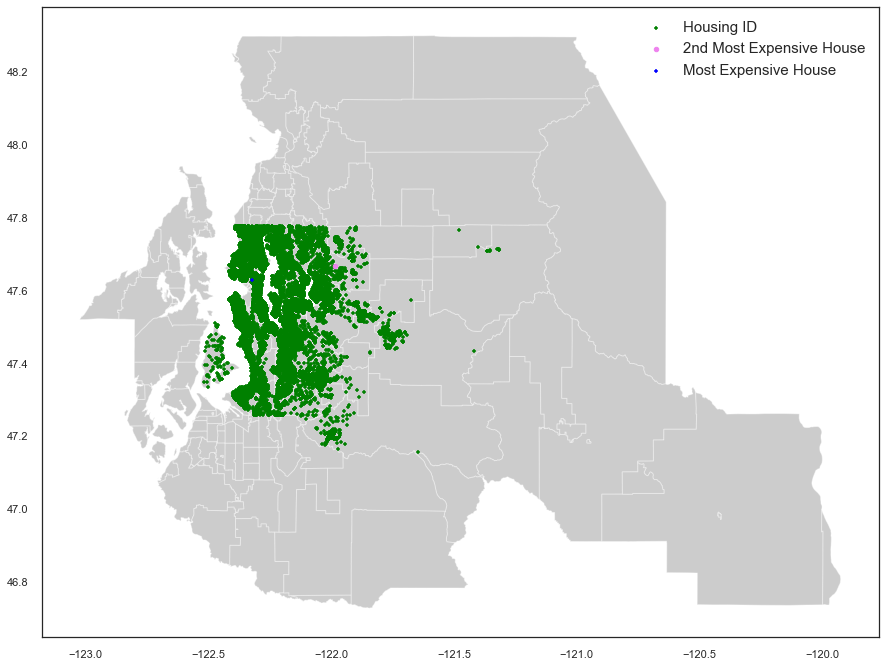

In [153]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
# geo_df[geo_df['Unnamed: 0'] >= 1000].plot(ax=ax, markersize = 20, color = 'blue', marker = "^", label = "Housing ID")
# geo_df[geo_df['Unnamed: 0'] <= 1000].plot(ax=ax, markersize = 20, color = 'red', marker = "o", label = "Housing ID")
geo_df[geo_df['price'] <= 7000000].plot(ax=ax, markersize = 20, color = 'green', marker = "+", label = "Housing ID")
geo_df[geo_df['Unnamed: 0'] == 3275].plot(ax=ax, markersize = 20, color = 'violet', marker = "o", label = "2nd Most Expensive House")
geo_df[geo_df['Unnamed: 0'] == 10366].plot(ax=ax, markersize = 20, color = 'blue', marker = "+", label = "Most Expensive House")




plt.legend(prop={'size': 15})

In [80]:
housing.shape

(4323, 22)

In [23]:
housing[500:540]

,Unnamed: 0,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
500,500,2329800110,20150128T000000,3,2.50,1770,6033,2.0,0,0,...,7,1770,0,1987,0,98042,47.3764,-122.119,1590,6510
501,501,8712100530,20140813T000000,4,2.00,1710,4178,1.5,0,0,...,8,1710,0,1926,0,98112,47.6373,-122.300,1760,4178
502,502,3814800300,20140811T000000,4,2.50,2810,11897,2.0,0,0,...,8,2810,0,2003,0,98092,47.3251,-122.186,1770,4240
503,503,4022300035,20141009T000000,3,1.00,1580,13912,1.0,0,0,...,8,1580,0,1955,0,98155,47.7552,-122.276,2130,16420
504,504,6021503840,20140610T000000,3,1.00,1580,5000,1.5,0,0,...,7,1580,0,1926,0,98117,47.6840,-122.386,1280,4000
505,505,5210200081,20141110T000000,3,1.00,1440,8681,1.5,0,0,...,7,1440,0,1937,0,98115,47.6976,-122.283,1700,7770
506,506,821049123,20141028T000000,4,2.50,2420,9147,2.0,0,0,...,10,2420,0,1998,0,98003,47.3221,-122.322,1400,7200
507,507,6929600945,20140825T000000,4,1.50,1930,15000,1.0,0,0,...,7,1930,0,1946,0,98198,47.3864,-122.312,1620,7500
508,508,5229300027,20140910T000000,3,1.00,1190,27215,1.0,0,0,...,7,1190,0,1943,1989,98059,47.4978,-122.115,1450,56628
509,509,2214800730,20140905T000000,4,2.50,2240,6944,1.0,0,2,...,7,1310,930,1979,0,98001,47.3380,-122.258,1780,7477


In [327]:
hf.corr()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Unnamed: 0,1.000000e+00,-0.006139,-0.012306,-0.010271,-0.004940,-0.008900,-0.003500,0.010599,-0.008845,-6.278161e-07,...,-0.005015,-0.003406,-0.012104,0.007496,-0.003423,0.006218,0.002470,-0.006992,-0.008961,0.000463
id,-6.138777e-03,1.000000,-0.015644,-0.001529,0.003833,-0.014251,-0.129837,0.017126,0.000101,1.259374e-02,...,0.003163,-0.013932,-0.003516,0.013697,-0.019560,-0.008166,-0.001865,0.017388,-0.007494,-0.139605
price,-1.230630e-02,-0.015644,1.000000,0.305106,0.524335,0.703540,0.086803,0.256985,0.275779,3.954851e-01,...,0.666215,0.607760,0.323312,0.056450,0.117770,-0.048958,0.302394,0.019327,0.585567,0.081423
bedrooms,-1.027127e-02,-0.001529,0.305106,1.000000,0.507867,0.570428,0.029375,0.172975,-0.008581,7.974076e-02,...,0.354679,0.472492,0.300085,0.153769,0.013679,-0.147515,-0.002170,0.124279,0.387589,0.026665
bathrooms,-4.939574e-03,0.003833,0.524335,0.507867,1.000000,0.755270,0.085470,0.497967,0.065848,1.888170e-01,...,0.664191,0.686853,0.282700,0.507761,0.048140,-0.201527,0.023074,0.221308,0.568080,0.086499
sqft_living,-8.900440e-03,-0.014251,0.703540,0.570428,0.755270,1.000000,0.166810,0.357169,0.109738,2.833358e-01,...,0.762929,0.876696,0.435529,0.319397,0.051448,-0.195893,0.052646,0.234453,0.755066,0.179570
sqft_lot,-3.500101e-03,-0.129837,0.086803,0.029375,0.085470,0.166810,1.000000,-0.002205,0.015356,7.305841e-02,...,0.110320,0.180755,0.008065,0.054228,0.004520,-0.126590,-0.082029,0.226190,0.136959,0.701875
floors,1.059874e-02,0.017126,0.256985,0.172975,0.497967,0.357169,-0.002205,1.000000,0.025132,2.588299e-02,...,0.458984,0.528509,-0.247481,0.483657,0.005985,-0.060560,0.048227,0.128795,0.283933,-0.008170
waterfront,-8.844970e-03,0.000101,0.275779,-0.008581,0.065848,0.109738,0.015356,0.025132,1.000000,4.075653e-01,...,0.092234,0.077162,0.083433,-0.021981,0.094268,0.034282,-0.013331,-0.042728,0.091090,0.026895
view,-6.278161e-07,0.012594,0.395485,0.079741,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000e+00,...,0.249554,0.164747,0.279939,-0.049593,0.091291,0.089475,0.003820,-0.077572,0.279999,0.073185


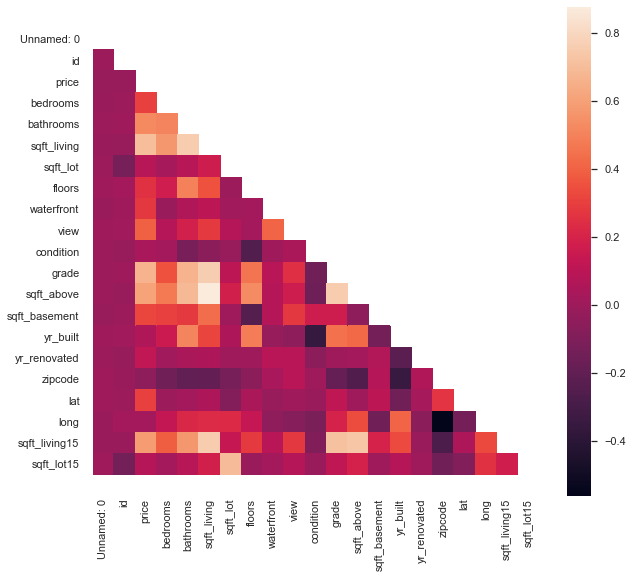

In [328]:
plt.style.use('seaborn')
sns.set(style="white")

# Set up  matplotlib figure (might have to play around with the 
# figsize if your labels aren't so legible and you don't want
# to mess with the labels using matplotlib)
f, ax = plt.subplots(figsize=(10, 9))

# Create an upper triangular matrix to use to get rid of duplicate/
# useless values
mask = np.zeros_like(hf.corr())
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
with sns.axes_style("white"):
    ax = sns.heatmap(hf.corr(), mask=mask, square=True)
    
# fix for mpl bug that cuts off top/bottom of seaborn viz
# credit: https://github.com/mwaskom/seaborn/issues/1773 SalMac86's post
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [329]:
price_corr = hf[hf.columns[:]].corr()['price'][:] 
price_corr.sort_values()

zipcode         -0.048958
id              -0.015644
Unnamed: 0      -0.012306
long             0.019327
condition        0.036099
yr_built         0.056450
sqft_lot15       0.081423
sqft_lot         0.086803
yr_renovated     0.117770
floors           0.256985
waterfront       0.275779
lat              0.302394
bedrooms         0.305106
sqft_basement    0.323312
view             0.395485
bathrooms        0.524335
sqft_living15    0.585567
sqft_above       0.607760
grade            0.666215
sqft_living      0.703540
price            1.000000
Name: price, dtype: float64

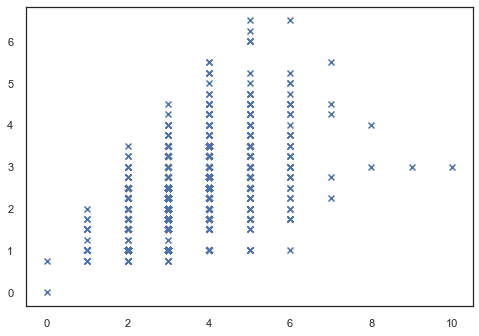

In [31]:
plt.scatter(housing['bedrooms'], housing['bathrooms'], marker ='x');

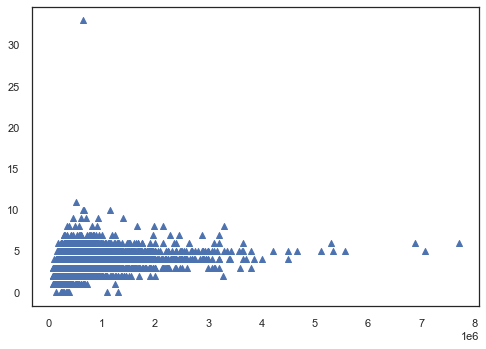

In [35]:
plt.scatter(hf['price'], hf['bedrooms'], marker = '^')

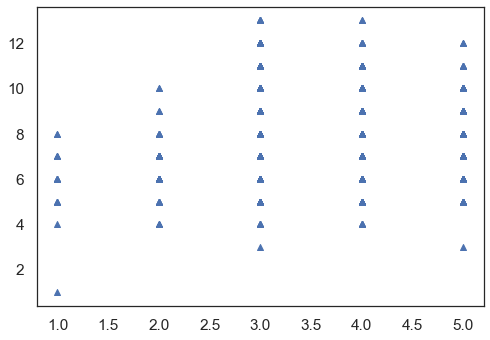

In [292]:
plt.scatter(hf['condition'], hf['grade'], marker = '^')

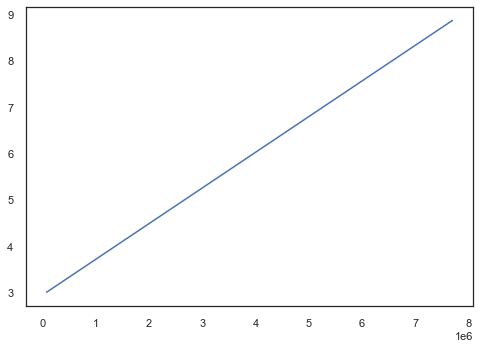

In [36]:
plt.plot(np.unique(hf['price']), np.poly1d(np.polyfit(hf['price'], hf['bedrooms'], 1))(np.unique(hf['price'])))

/Users/astroraf/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='bedrooms'>

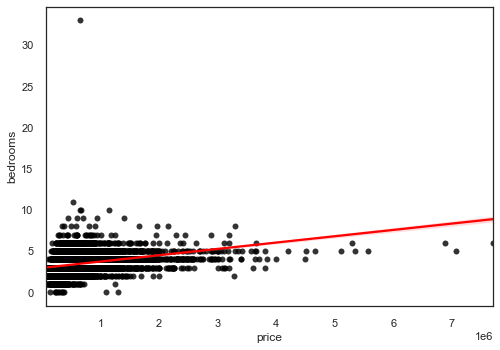

In [38]:

sns.regplot(hf['price'],hf['bedrooms'], scatter_kws={"color": "black"}, line_kws={"color": "red"})

/Users/astroraf/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='bathrooms'>

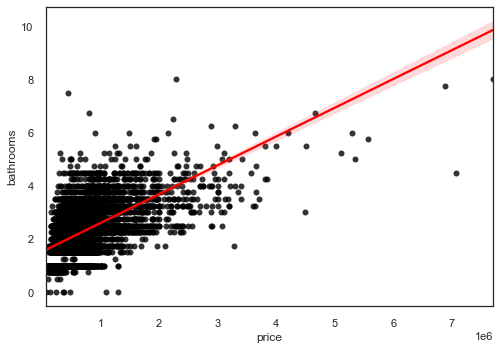

In [39]:
sns.regplot(hf['price'],hf['bathrooms'], scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [150]:
hf[hf['sqft_living'] >= 12000]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
3275,3275,1225069038,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,...,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,POINT (-121.98600 47.66750)
10366,10366,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,...,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,POINT (-122.32300 47.62980)


<function matplotlib.pyplot.show(close=None, block=None)>

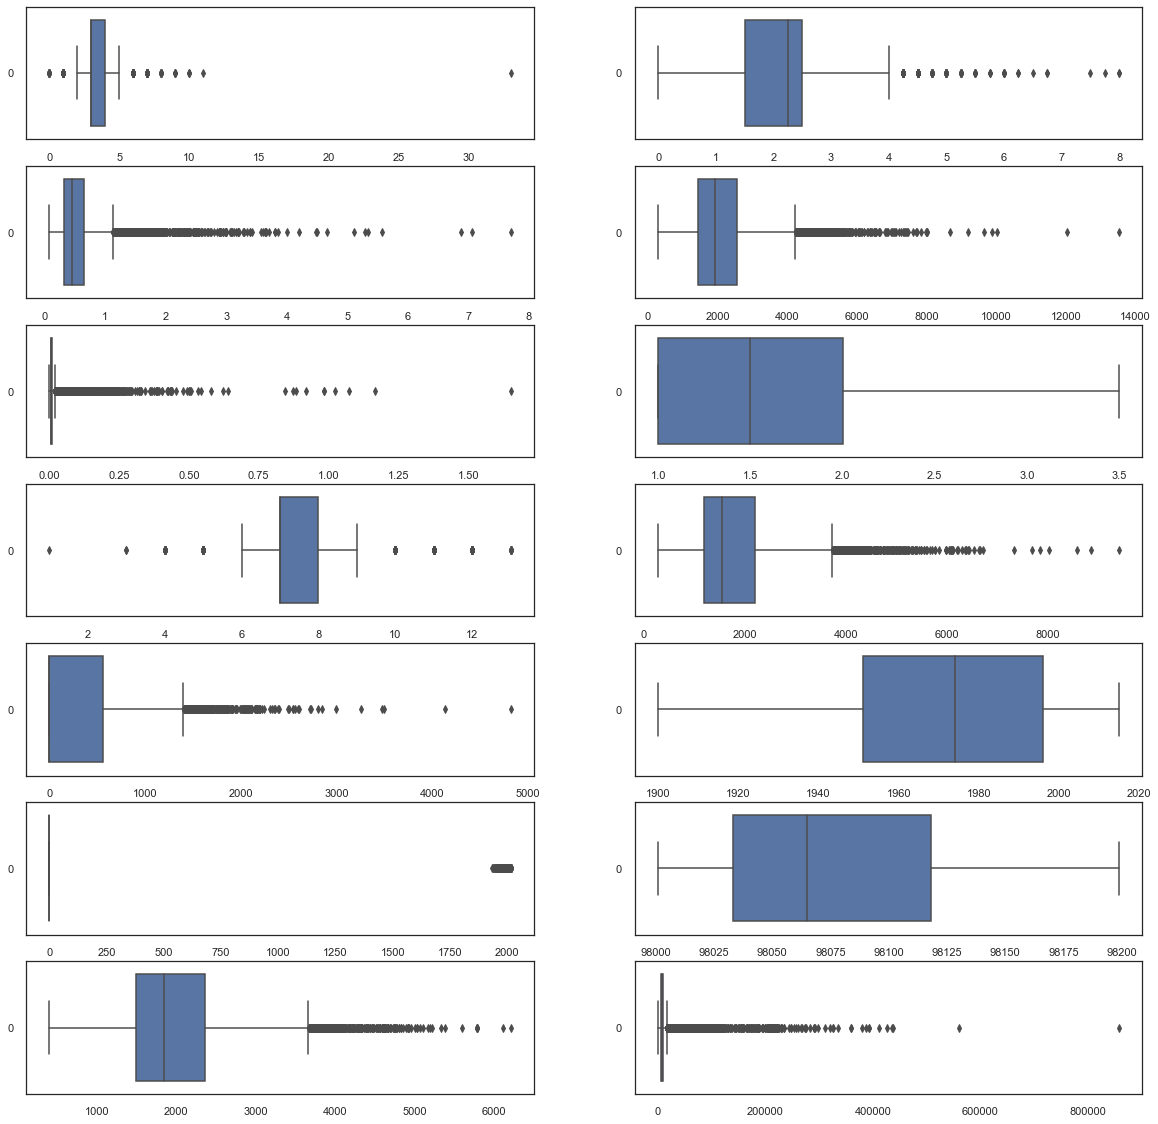

In [156]:
fig, axes = plt.subplots(7,2, figsize = (20, 20))


sns.boxplot(ax = axes[0,0], data = hf['bedrooms'], orient = 'h')
sns.boxplot(ax = axes[0,1], data = hf['bathrooms'], orient = 'h')
sns.boxplot(ax = axes[1,0], data = hf['price'], orient = 'h')
sns.boxplot(ax = axes[1,1], data = hf['sqft_living'], orient = 'h')
sns.boxplot(ax = axes[2,0], data = hf['sqft_lot'], orient = 'h')
sns.boxplot(ax = axes[2,1], data = hf['floors'], orient = 'h')
sns.boxplot(ax = axes[3,0], data = hf['grade'], orient = 'h')
sns.boxplot(ax = axes[3,1], data = hf['sqft_above'], orient = 'h')
sns.boxplot(ax = axes[4,0], data = hf['sqft_basement'], orient = 'h')
sns.boxplot(ax = axes[4,1], data = hf['yr_built'], orient = 'h')
sns.boxplot(ax = axes[5,0], data = hf['yr_renovated'], orient = 'h')
sns.boxplot(ax = axes[5,1], data = hf['zipcode'], orient = 'h')
sns.boxplot(ax = axes[6,0], data = hf['sqft_living15'], orient = 'h')
sns.boxplot(ax = axes[6,1], data = hf['sqft_lot15'], orient = 'h')


plt.show

In [ ]:
housing.describe()

In [160]:
a = housing.zipcode.unique()
hf['geometry']

0        POINT (-122.16200 47.43880)
1        POINT (-122.28500 47.67840)
2        POINT (-122.12900 47.56460)
3        POINT (-122.22800 47.69950)
4        POINT (-122.08300 47.66470)
                    ...             
17285    POINT (-122.11200 47.58580)
17286    POINT (-122.28800 47.66870)
17287    POINT (-122.26200 47.76350)
17288    POINT (-121.99000 47.41990)
17289    POINT (-122.31900 47.73660)
Name: geometry, Length: 17290, dtype: geometry

In [16]:
print(sorted(a))

[98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199]


In [159]:
hf.keys()

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'geometry'],
      dtype='object')

In [183]:
numerical = ['price', 'sqft_living', 'sqft_lot', 'view',
             'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15'
    
]

categorical = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade', 'zipcode'
    
]

houses = hf[numerical + categorical]

houses.shape

(17290, 17)

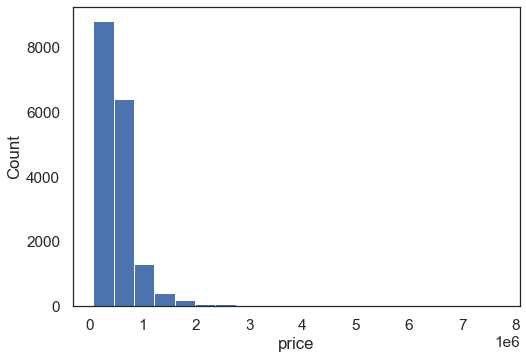

In [184]:
sns.set_context('notebook', font_scale = 1.4)

sns.distplot(
    houses['price'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='price', ylabel='Count');

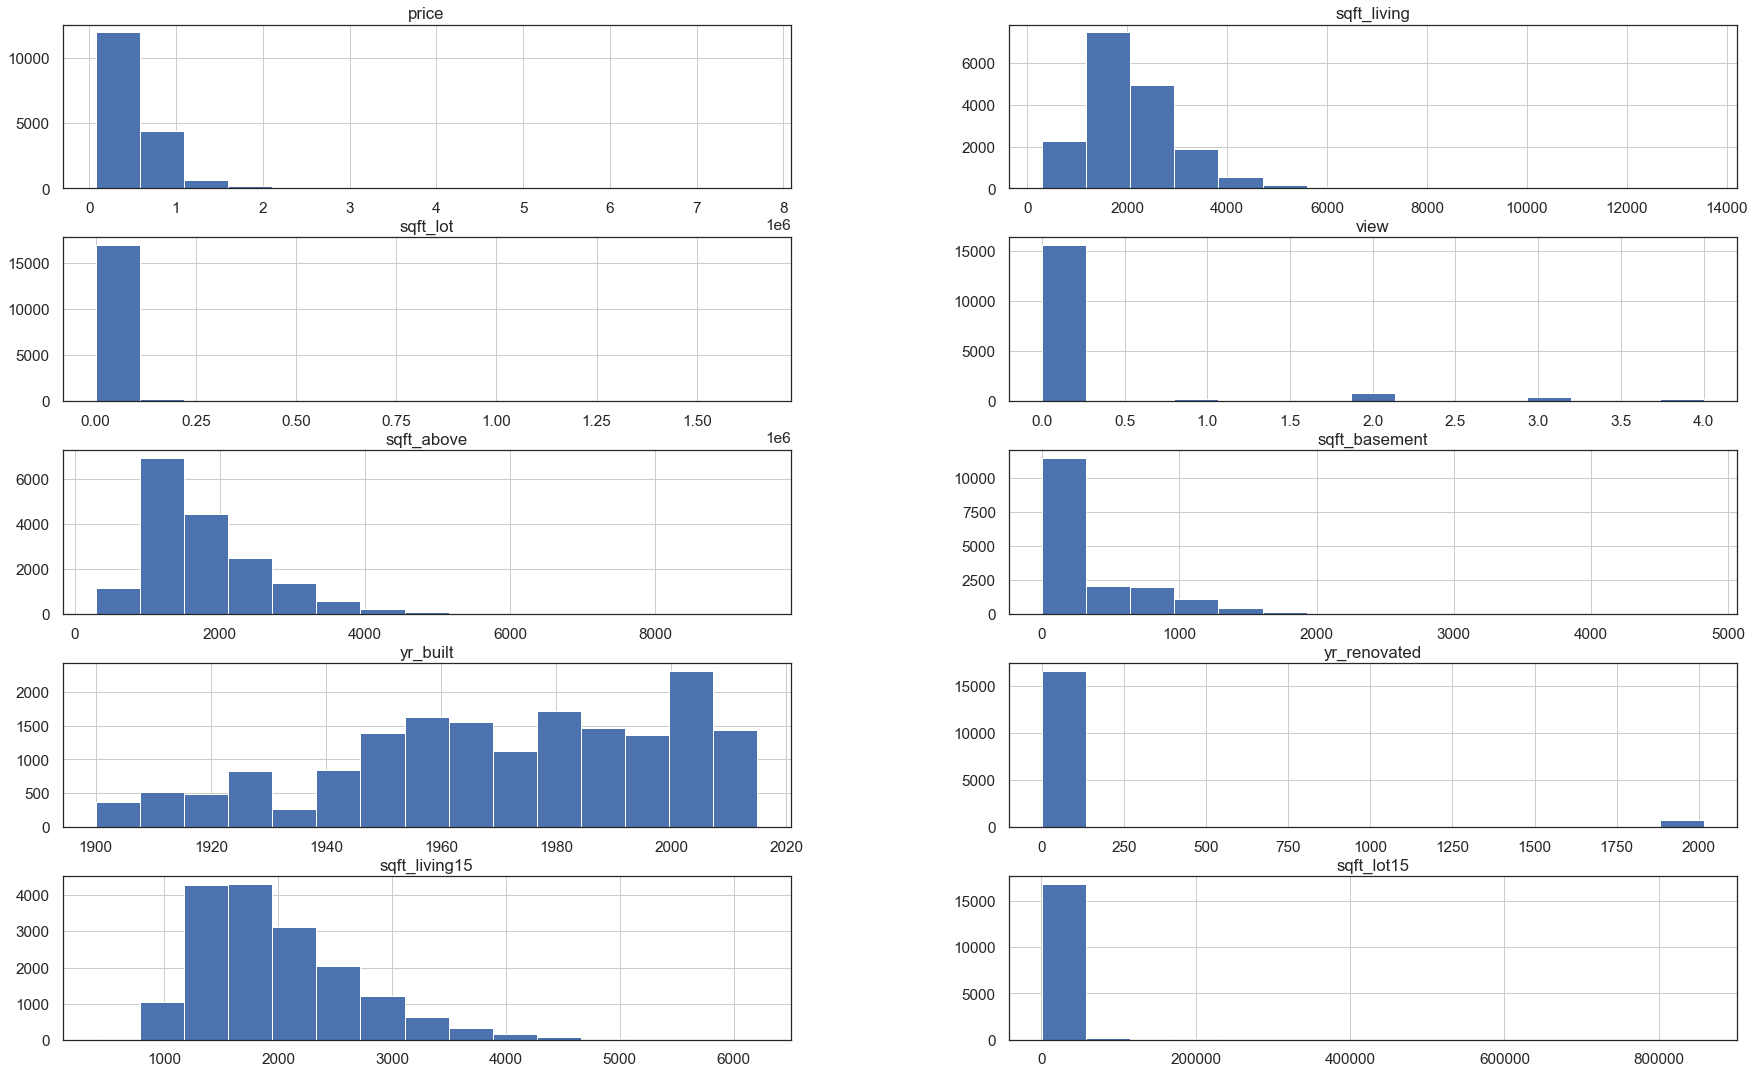

In [185]:
houses[numerical].hist(bins=15, figsize=(30, 50), layout=(13, 2));


/Users/astroraf/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/astroraf/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/astroraf/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

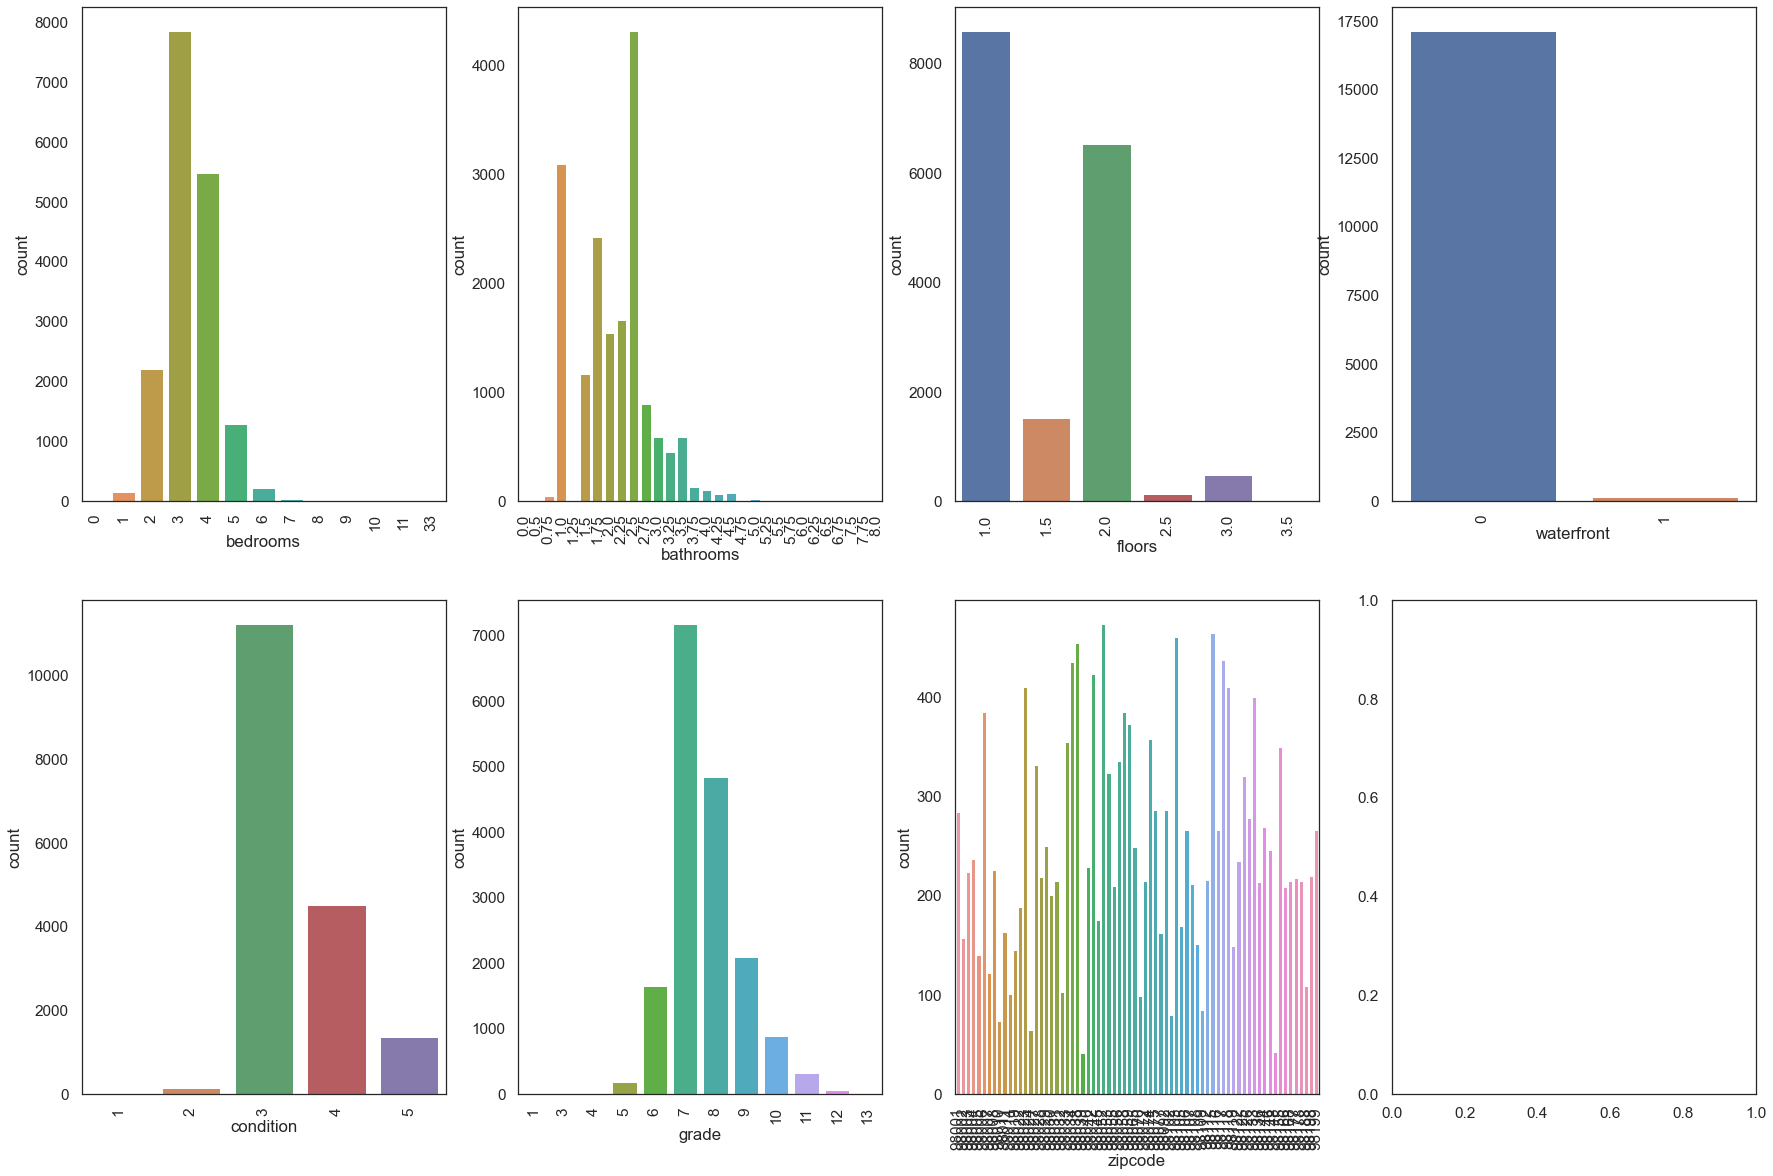

In [189]:
fig, ax = plt.subplots(2, 4, figsize=(30, 20))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(houses[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

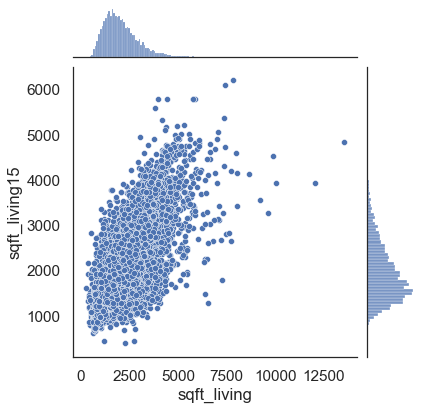

In [225]:
sns.jointplot(x=houses['sqft_living'], y=houses['sqft_living15']);


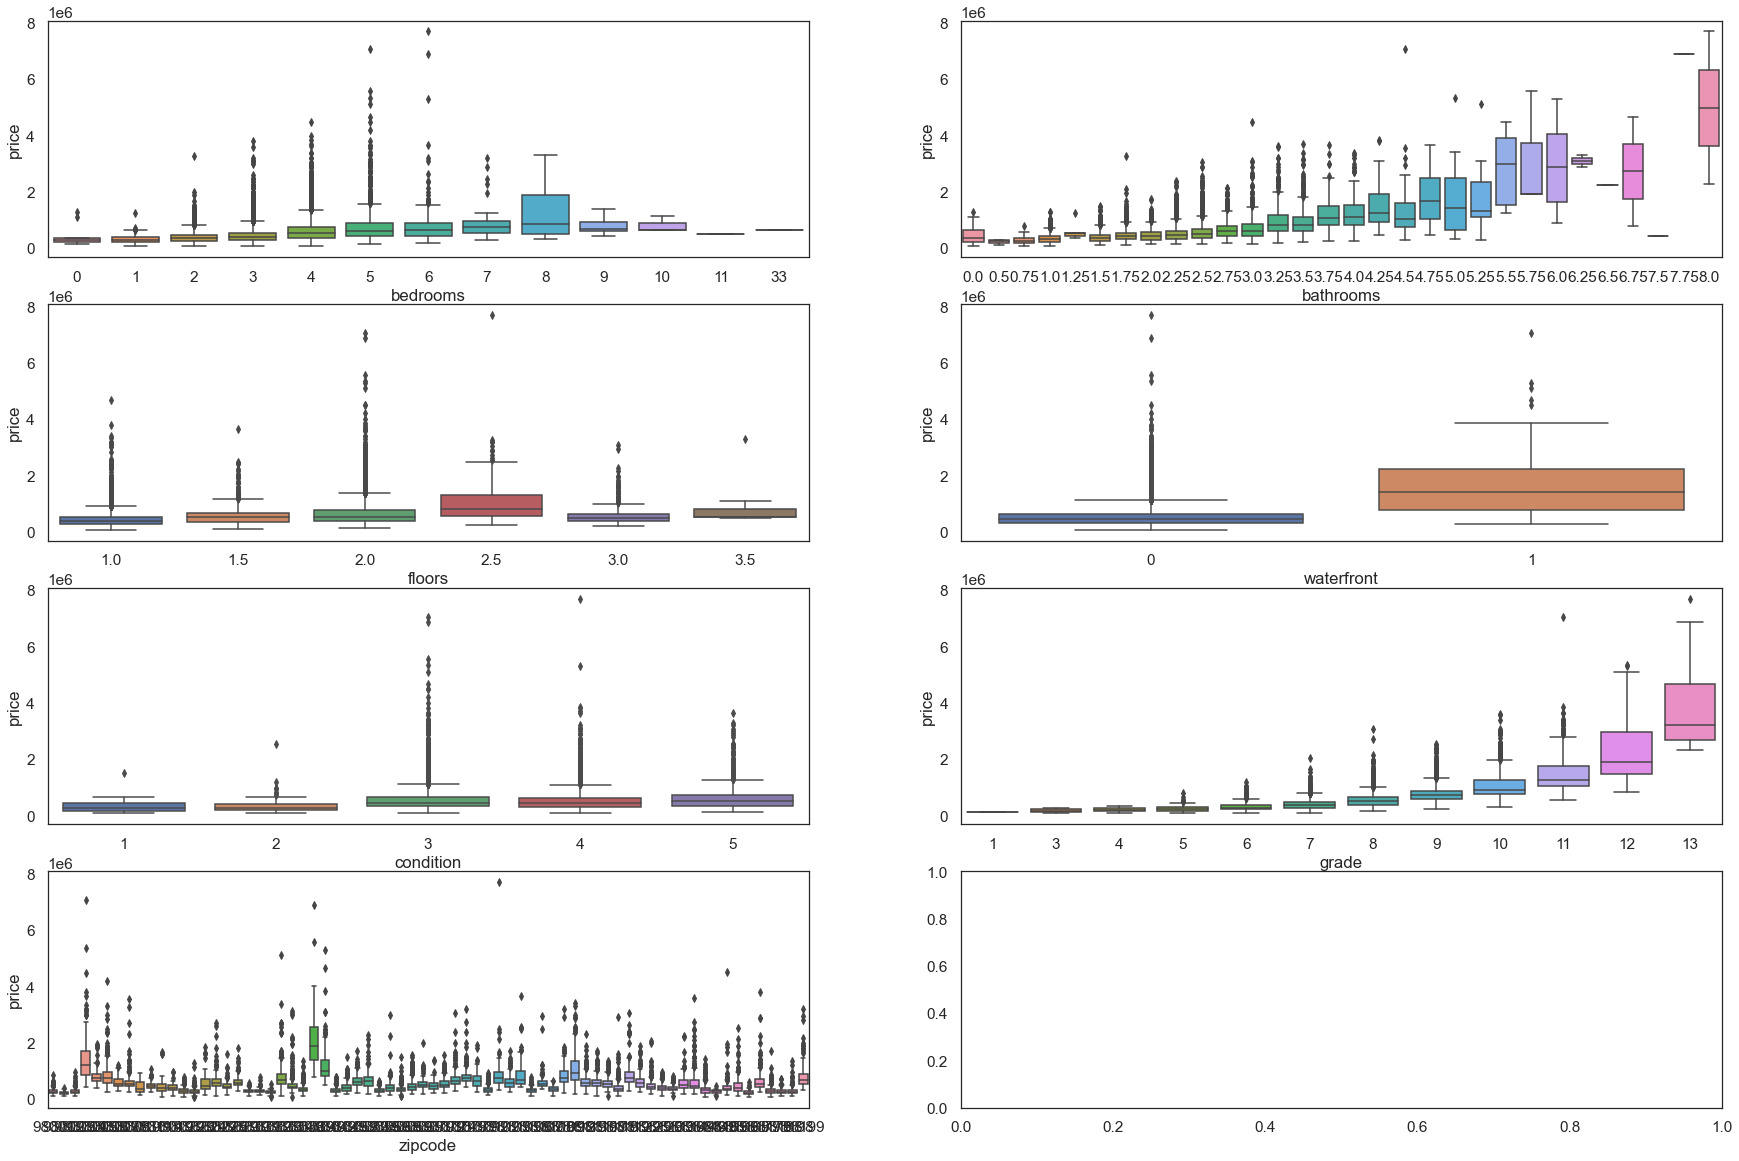

In [197]:

fig, ax = plt.subplots(4, 2, figsize=(30, 20))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='price', data=houses, ax=subplot)

<AxesSubplot:xlabel='zipcode', ylabel='price'>

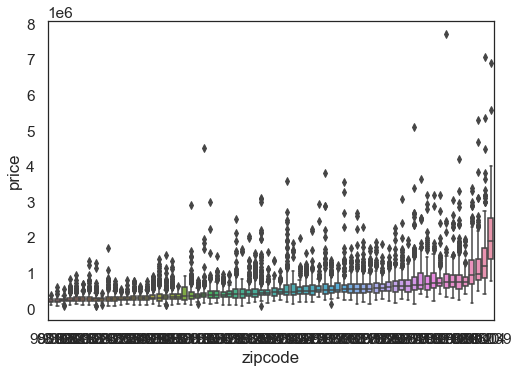

In [201]:
sorted_nb = houses.groupby(['zipcode'])['price'].median().sort_values()
sns.boxplot(x=houses['zipcode'], y=houses['price'], order=list(sorted_nb.index))

In [341]:
hf[(hf['bathrooms'] == 2)]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
5,5,1761300310,20140827T000000,211000.0,4,2.0,1710,8288,1.5,0,...,1710,0,1970,0,98031,47.3947,-122.174,1710,7200,POINT (-122.17400 47.39470)
20,20,2291401425,20140910T000000,485000.0,5,2.0,1910,5508,1.0,0,...,1020,890,1968,0,98133,47.7074,-122.349,1030,7440,POINT (-122.34900 47.70740)
38,38,6675500105,20140729T000000,306000.0,3,2.0,1160,7217,1.0,0,...,1160,0,1969,0,98034,47.7279,-122.227,1870,9104,POINT (-122.22700 47.72790)
43,43,7853361210,20150218T000000,400000.0,3,2.0,1650,5027,1.5,0,...,1650,0,2009,0,98065,47.5150,-121.874,2430,6000,POINT (-121.87400 47.51500)
46,46,3755200220,20140718T000000,334009.0,4,2.0,1650,9305,1.0,0,...,1650,0,1960,0,98034,47.7183,-122.213,1860,7486,POINT (-122.21300 47.71830)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17226,17226,4151800470,20140820T000000,675000.0,3,2.0,1010,5973,1.0,0,...,1010,0,1942,0,98033,47.6652,-122.202,1920,6015,POINT (-122.20200 47.66520)
17259,17259,809003105,20150408T000000,935000.0,3,2.0,1720,2000,1.5,0,...,1060,660,1910,2000,98109,47.6384,-122.350,1590,4000,POINT (-122.35000 47.63840)
17270,17270,1330250010,20140604T000000,289950.0,3,2.0,1670,7757,1.0,0,...,1670,0,1992,0,98030,47.3802,-122.207,2290,7859,POINT (-122.20700 47.38020)
17277,17277,3797300110,20141027T000000,330000.0,3,2.0,2500,10697,1.0,0,...,2500,0,1994,0,98022,47.1927,-122.010,2560,9772,POINT (-122.01000 47.19270)


## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [326]:
hf

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,...,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,POINT (-122.16200 47.43880)
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,...,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,POINT (-122.28500 47.67840)
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,...,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,POINT (-122.12900 47.56460)
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,...,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,POINT (-122.22800 47.69950)
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,...,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,POINT (-122.08300 47.66470)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,...,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,POINT (-122.11200 47.58580)
17286,17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,...,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,POINT (-122.28800 47.66870)
17287,17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,...,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,POINT (-122.26200 47.76350)
17288,17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,...,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,POINT (-121.99000 47.41990)


In [335]:
len(hf)

17290

In [334]:
hf['yr_renovated'].value_counts()

0       16564
2014       71
2007       32
2005       32
2000       31
        ...  
1934        1
1959        1
1944        1
1951        1
1948        1
Name: yr_renovated, Length: 69, dtype: int64

In [332]:
hf['yr_renovated'].isin([0]).sum() 

16564

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [ ]:
# your code here

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [ ]:
#your code here

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [ ]:
#your code here 

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [ ]:
# your code here

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [ ]:
# your code here

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [1]:
#your code here 

### 5.2) Fit your scaler to training the data.

In [2]:
#your code here 

### 5.3) Transform the testing set with the scaler.

In [3]:
#your code here 

### 5.4) Fit the model to the training data.

In [4]:
#your code here 

### 5.5) Use the model to predict on the training set and the test set.

In [5]:
#your code here 

### 5.6) Evaluate the training and test predictions using RMSE.

In [6]:
#your code here 

### 5.7) Determine if your model is overfit.

In [ ]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [7]:
# your code here

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [8]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/